In [75]:
#목표2. 
#제주도 호텔 리뷰 데이터 전처리를 한 데이터를 가지고 Logistic Regression 분류하고, 
#정확한 모델링을 하기 위한 1:1 샘플링하는 과정을 통한 데이터분석의 일련의 과정을 보여줌 


%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/tripadviser_review.csv")

In [49]:
#로지스틱 회귀 분류 
df.head()


,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


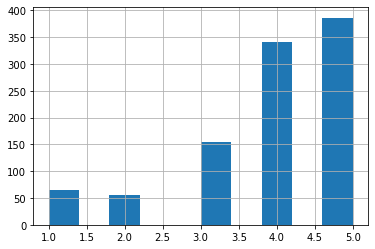

In [50]:
df.rating.hist()

In [77]:
def rating_to_label(rating):
    if rating >3:
        return 1 
    else:
        return 0
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [78]:
df.head()

,rating,text,y
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,1
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",1
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,1
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,1
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,1


In [79]:
df.y.value_counts()

1    726
0    275
Name: y, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

y= df['y']
x_train, x_test ,y_train , y_test = train_test_split(tf_idf_vect, y, test_size =0.3 )

In [89]:
print(x_train.shape)
print(x_test.shape)

(700, 3599)
(301, 3599)


In [90]:
#모델 학습 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#train LR
lr =LogisticRegression(random_state=0)
lr.fit(x_train, y_train )


y_pred = lr.predict(x_test) 

In [91]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.73
Precision : 0.725
Recall : 0.995
F1 : 0.839


In [92]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


[[  5  81]
 [  1 214]]


In [93]:
#샘플링 재조정 

positive_random_idx = df[df['y']==1].sample(275, random_state=33).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=33).index.tolist()

In [94]:
random_idx = positive_random_idx + negative_random_idx
X = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [95]:
print(x_train.shape)
print(x_test.shape)

(412, 3599)
(138, 3599)


In [98]:

#train LR
lr =LogisticRegression(random_state=0)
lr.fit(x_train, y_train )


y_pred = lr.predict(x_test) 

In [99]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.72
Precision : 0.644
Recall : 0.797
F1 : 0.712


In [100]:

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#성능의 훨신 떨어짐 ... ㄷㄷ 

[[53 26]
 [12 47]]
